In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import h5py
from fact.io import read_h5py, read_h5py_chunked
import pickle
plt.style.use('ggplot')

%matplotlib inline

"""This are the most relevant features,
for source indibendent classification. There is although the feature theta to 
make a theta cut because in the crab dataset are a few gammas too. Because 
theta is the best parameter for classification I make a litlle gamma cut to 
tread sure that there are only hadrons in the crab-set.
"""
feature = ['conc_core',
	'concentration_one_pixel',    
	'concentration_two_pixel',
	'leakage', 
	'leakage2', 
	'size', 
	'width', 
	'num_islands', 
	'num_pixel_in_shower', 
	'ph_charge_shower_max',
	'ph_charge_shower_mean',
	'ph_charge_shower_min',
	'ph_charge_shower_variance',
	'theta_deg']

"""
For a lower loadingtime not the whole dataset is loading. Whit the command next
the next block is loading in the same dimension. The parameters start and end 
return the values in which row the loading datas are.
"""
print('-----loading crab datas')
crab_it = read_h5py_chunked(
	'data/crab_precuts.hdf5',
	key='events',
	columns=feature,
	chunksize=250000)
print('start next')
crab, start, end = next(crab_it)

gammas = pd.read_hdf('data/gamma_precuts.hdf5')


-----loading crab datas
start next


In [3]:
gammas['label'] = 1
crab['label'] = 0
data = pd.concat([gammas,crab])

In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

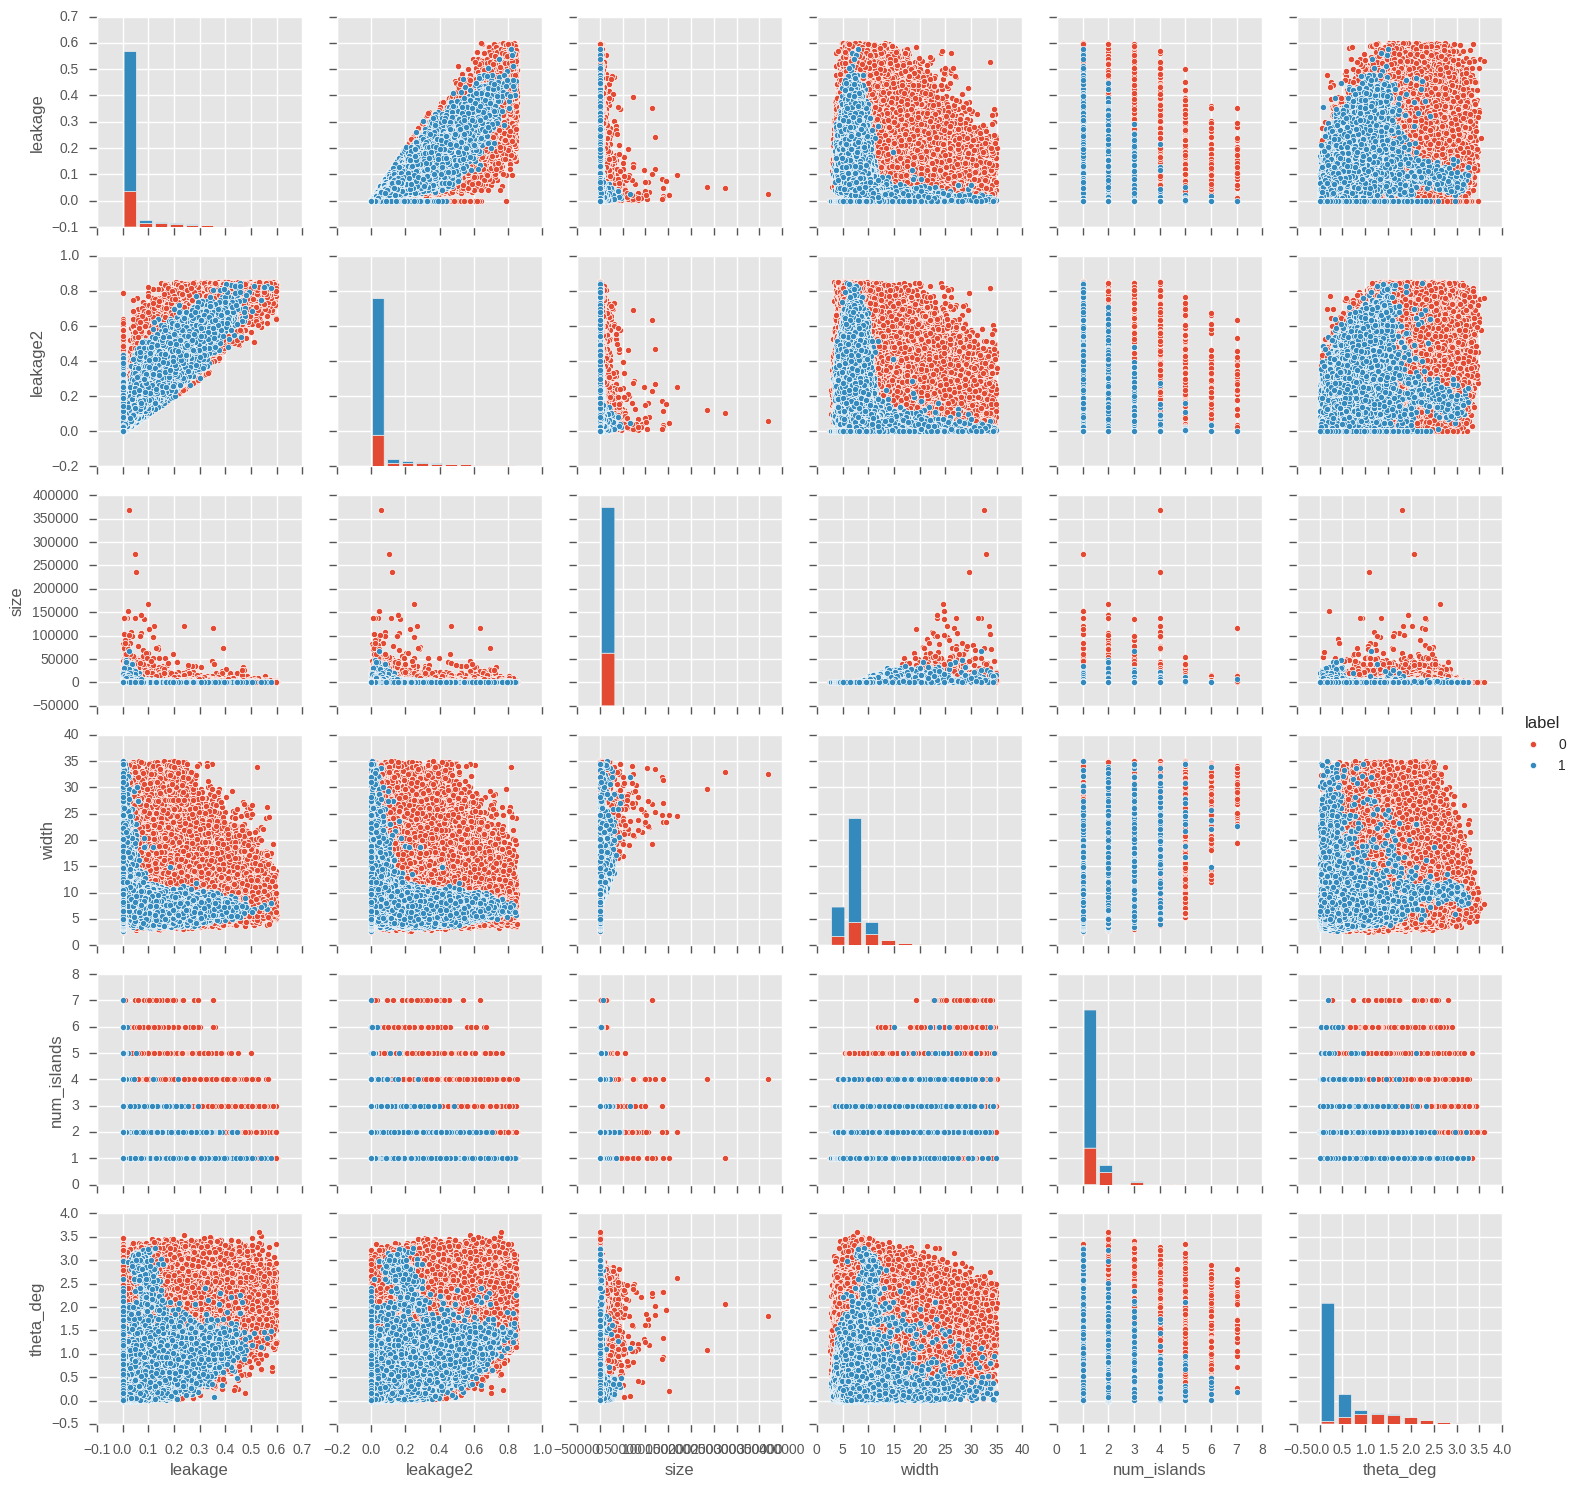

In [9]:
g = sns.pairplot(data, hue='label', vars=['leakage', 
	'leakage2', 
	'size', 
	'width', 
	'num_islands',
    'theta_deg'])